In [3]:
# models implemented
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The main class
class UniLinearRegression:
    def __init__(self):
        self.x = [] # Independent value(s), which needs to be determined by the independent value(s)
        self.y = [] # Dependent value(s), value(s) that is used to predict the dependent value(s)
        self.optimized_model = None
        self.plt = plt
    def check_valid(self):
        # Function that checks if the class is sufficient to perform a prediction
        if(self.x.size <= 0 or self.y.size <= 0): # Error Handler
            print(f"x : {x.tolist()}, y : {y.tolist()} is not sufficient to perform such prediction")
            return False
        return True
    def h(self, theta1, theta0, x): #hypothesis function
            return theta1 * x + theta0
        
    def fit(self, x = [], y = []):
        """
        Function that fit the data using Gradient Descent
        :param x: The independent value(s)
        :param y: The dependent value(s)
        """
        x, y = x.astype('float64'), y.astype('float64')
        self.x, self.y = x, y
        # Validation
        if not self.check_valid(): return
        
        # Implementing Gradient Descent
        def Loss(theta1, theta0, x, y): #loss function
            return np.mean((self.h(theta1, theta0, x) - y) ** 2)

        def gradient(theta1, theta0, x, y): #gradient
            return np.mean(x * (theta1 * x + theta0 - y), axis=-1), np.mean(theta1 * x + theta0 - y, axis=-1)

        def gradient_descent(theta1, theta0, x, y, alpha=0.000001, epsilon=0.00001):
            prev_loss = 0
            temp1, temp0 = 0, 0
            loss = np.array([])
            while True:
                gradient_a, gradient_b = gradient(theta1, theta0, x, y)
                if abs(Loss(theta1, theta0, x, y) - prev_loss) < epsilon:
                    break
                prev_loss = Loss(theta1, theta0, x, y)
                loss = np.insert(loss, len(loss), prev_loss)
                temp1 += gradient_a**2
                temp0 += gradient_b**2
                theta1 -= (alpha / (temp1 ** 0.5)) * gradient_a
                theta0 -= (alpha / (temp0 ** 0.5)) * gradient_b
            return theta1, theta0, loss.tolist().pop()/2
        theta1_0, theta0_0 = 0 , 1
        self.optimized_model = gradient_descent(theta1_0, theta0_0, x, y, alpha=0.1)
        #print(self.optimized_model)
        
    def print(self):
        # Validation
        if not self.check_valid(): return
        theta1, theta0, loss = self.optimized_model
        print(f"Optimized Model : {round(theta0,1)}+({round(theta1,1)}x)\nLoss : {round(loss,2)}")
    def plot(self):
        # Validation
        if not self.check_valid(): return
        # Plot
        self.plt.scatter(self.x, self.y, color="black", s=35) # plot data points
        theta1, theta0, loss = self.optimized_model
        prediction = self.h(theta1,theta0,self.x)
        self.plt.plot(x, prediction, color="red", linewidth=5.0) # plot prediction
        self.plt.show()

Test Exception:
x : [], y : [] is not sufficient to perform such prediction
x : [], y : [[3], [1], [2]] is not sufficient to perform such prediction

Simple Data Test:
Optimized Model : 2.9+(-0.5x)
Loss : 0.25


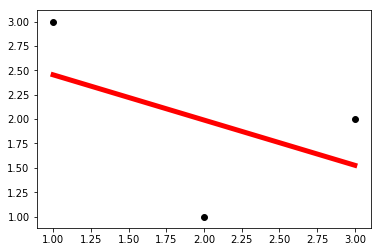


Complex Data Test:
Optimized Model : -9.8+(1.2x)
Loss : 919.41


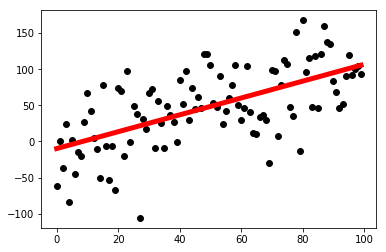

In [4]:
# Test exception
print("Test Exception:")
x, y = np.array([]),np.array([])
UniLR = UniLinearRegression()
UniLR.fit(x,y)
x, y = np.array([]), np.array([[3],[1],[2]])
UniLR.fit(x,y)
print()

# Simple Data Test
print("Simple Data Test:")
x, y = np.array([1,2,3]), np.array([3,1,2])
UniLR.fit(x,y)
UniLR.print()
UniLR.plot()
print()

# Complex Data Test
print("Complex Data Test:")
x, y = np.arange(100), np.arange(100)+np.random.normal(size = 100)*40
UniLR.fit(x,y)
UniLR.print()
UniLR.plot()
print()